## I. Exploration des données 

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import tensorflow as tf
import numpy as np 
from sklearn.ensemble import StackingRegressor
import csv 

In [2]:
x_train = pd.read_csv(r'C:\Users\Utilisateur\Desktop\data challenge\Xtrain_hgcGIrA.csv') 
y_train = pd.read_csv(r'C:\Users\Utilisateur\Desktop\data challenge\Ytrain_yL5OjS4.csv')
x_test = pd.read_csv(r'C:\Users\Utilisateur\Desktop\data challenge\Xtest.csv')
display(x_train.head())
display(y_train.head())
display(x_test.head())

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096


,Unnamed: 0,p0q0
0,1,0.216
1,2,0.216
2,3,0.227
3,4,0.229
4,5,0.225


,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3
0,2019-05-21,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.226,0.165,0.128
1,2019-05-22,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.221,0.159,0.114
2,2019-05-27,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.227,0.175,0.133
3,2019-05-29,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.200,0.148,0.105
4,2019-06-03,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.221,0.169,0.126


In [3]:
x_train["p0q0"] = y_train["p0q0"]
display(x_train.head())

,date,train,way,station,hour,composition,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0
0,2019-01-07,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.201,0.138,0.091,0.216
1,2019-01-08,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.204,0.152,0.106,0.216
2,2019-01-10,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.153,0.111,0.227
3,2019-01-11,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.213,0.152,0.108,0.229
4,2019-01-14,1,0,AD,06:00:00,2,NaN,NaN,NaN,0.210,0.147,0.096,0.225


In [4]:
def valeurs_manquantes(data):
    return (
        (data.isnull().sum() / len(data))
        .sort_values(ascending=False)
        .rename_axis("Column")
        .reset_index(name="Pourcentage")
        .query("Pourcentage > 0")
    )
display(valeurs_manquantes(x_train))
display(valeurs_manquantes(x_test))

,Column,Pourcentage
0,p0q3,0.308236
1,p0q2,0.205630
2,p3q0,0.198721
3,p2q0,0.133198
4,hour,0.102960
5,p0q1,0.102895
6,p1q0,0.065940


,Column,Pourcentage
0,p0q3,0.305119
1,p0q2,0.203534
2,p3q0,0.193426
3,p2q0,0.126891
4,hour,0.102240
5,p0q1,0.101803
6,p1q0,0.062027


#### On observe des données manquantes dans les colonnes : p1q0, p3q0, p3q0 , p0q1, p0q2, p0q3 et hour 

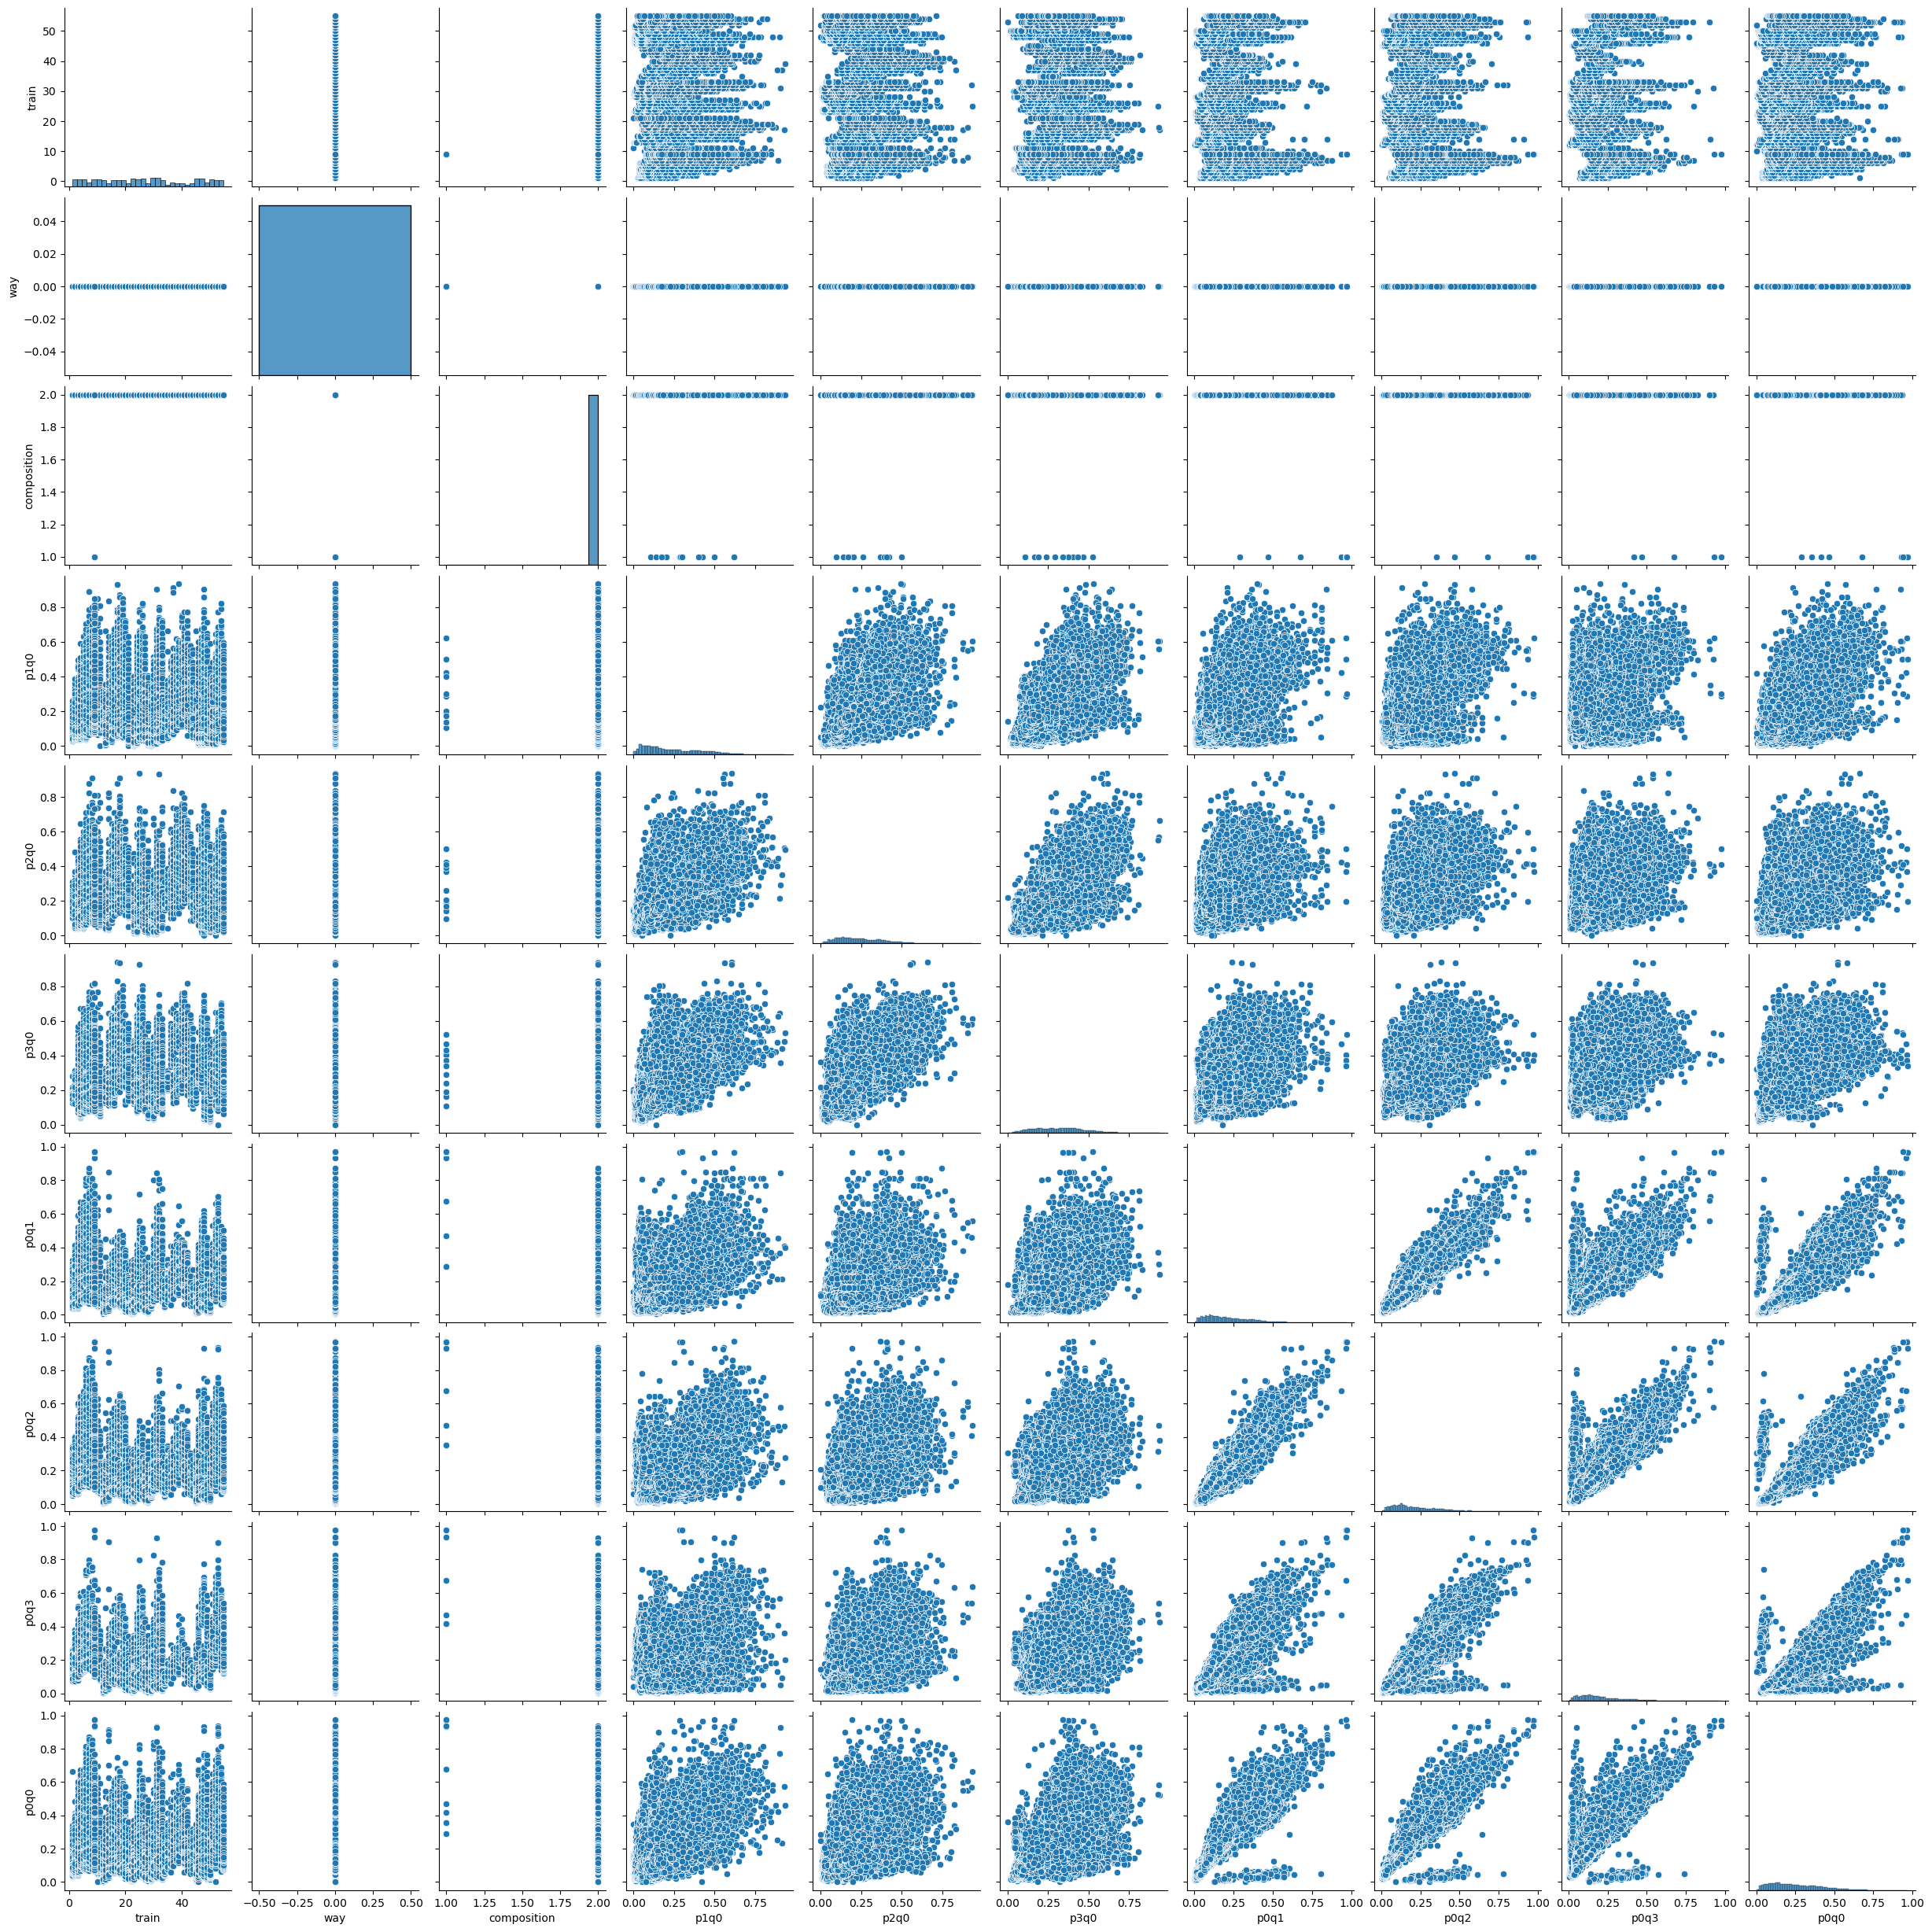

In [5]:
sns.pairplot(x_train)
plt.show()

#### On observe une forte corrélation pour way et composition

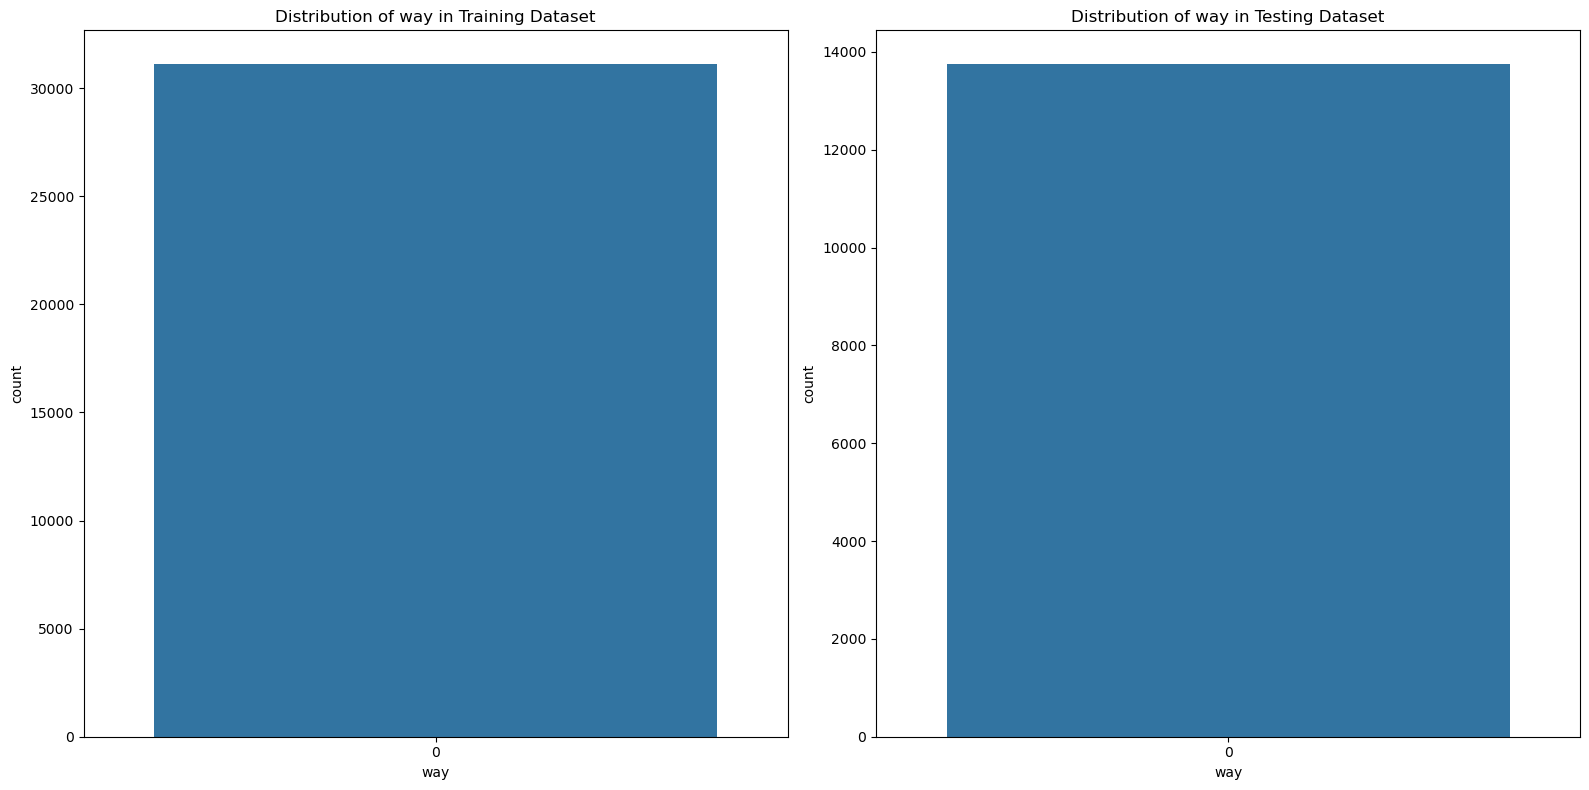

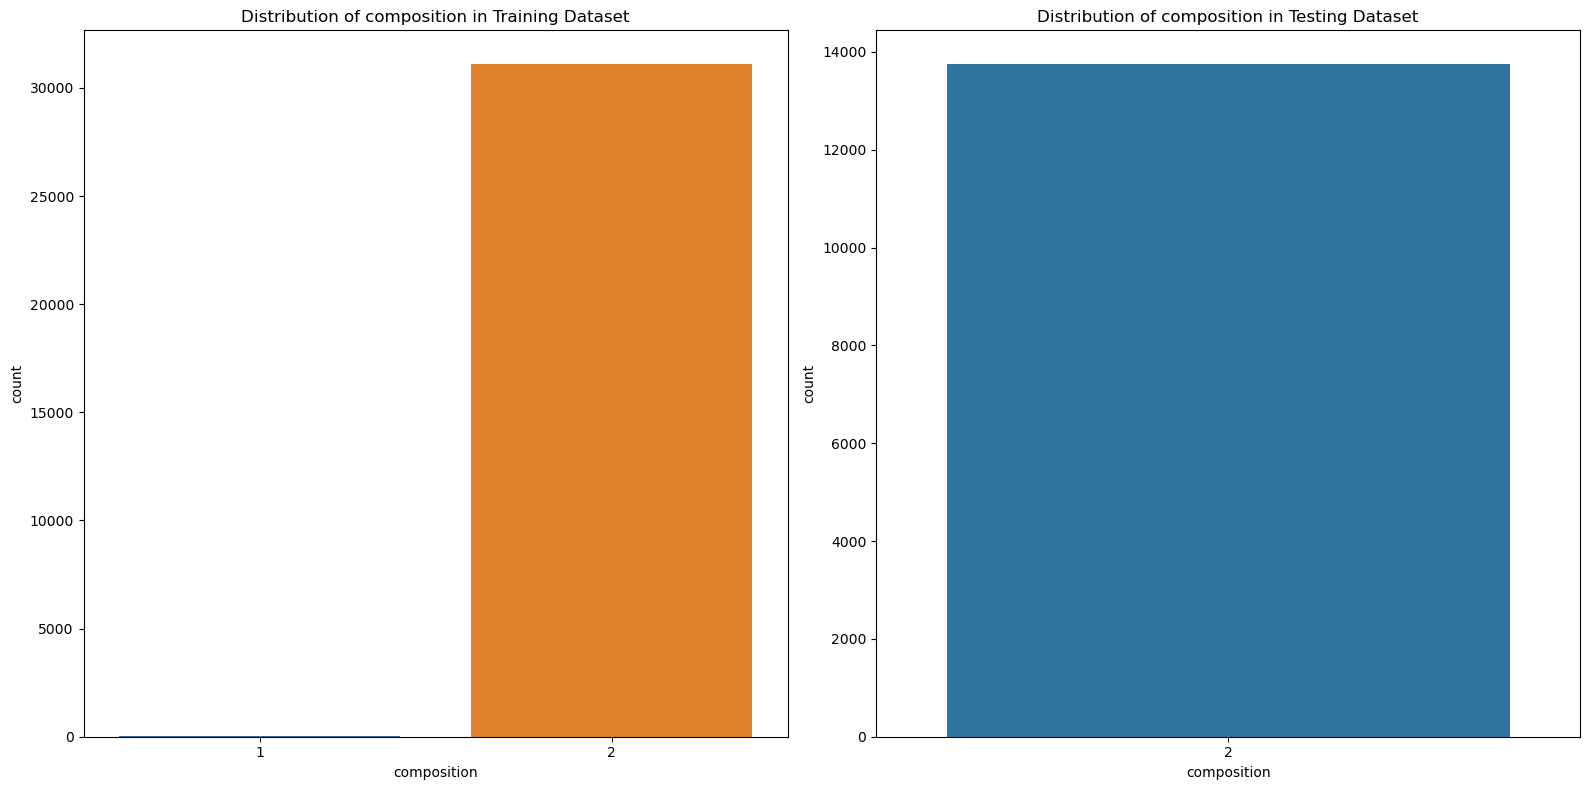

In [6]:
def distribution(training_data, testing_data, col_name):

    # Ensure the column is present in both datasets
    if col_name not in training_data.columns:
        print(f"The column '{col_name}' is not present in the training dataset.")
        return
    if col_name not in testing_data.columns:
        print(f"The column '{col_name}' is not present in the testing dataset.")
        return

    # Setting up the subplot environment
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))

    # Calculate the counts for the training data
    train_counts = training_data[col_name].value_counts().reset_index()
    train_counts.columns = [col_name, 'count']
    sns.barplot(x=col_name, y='count', data=train_counts, ax=ax[0])
    ax[0].set_title(f'Distribution of {col_name} in Training Dataset')

    # Calculate the counts for the testing data
    test_counts = testing_data[col_name].value_counts().reset_index()
    test_counts.columns = [col_name, 'count']
    sns.barplot(x=col_name, y='count', data=test_counts, ax=ax[1])
    ax[1].set_title(f'Distribution of {col_name} in Testing Dataset')

    plt.tight_layout()
    plt.show()
    
distribution(x_train, x_test, "way")
distribution(x_train, x_test, "composition")


#### On n'utilise pas 'composition' = 1 dans le  test set ! 

### I.1. Drop la colonne $\textit{way}$ : 

In [7]:
if "way" in x_train.columns:
    x_train = x_train.drop("way", axis=1)
if "way" in x_test.columns:
    x_test = x_test.drop("way", axis=1)

### I.2 Drop la colonne  $\textit{composition}$ : 

In [8]:
# Drop les lignes où 'composition' est égale à 1 
if "composition" in x_train.columns:
    x_train.drop(x_train[x_train["composition"] == 1].index, inplace=True)
    x_train.drop("composition", axis=1, inplace=True)

if "composition" in x_test.columns:
    x_test.drop("composition", axis=1, inplace=True)

### I.3 On transforme les données manquantes avec des flags: 

In [9]:
def transfo_donnees_manquantes(df, column_name):
    # Remplacer les valeurs NaN par -1
    df[column_name].fillna(-1, inplace=True)

    # Ajouter la colonne de flag
    flag_column_name = f"flag_{column_name}"
    df[flag_column_name] = (df[column_name] == -1).astype(int)

    return df

In [10]:
#Transformation de "p0q1", "p0q2", "p0q3", "p1q0", "p2q0", "p3q0"
colonnes = ["p0q1", "p0q2", "p0q3", "p1q0", "p2q0", "p3q0"]

for col in colonnes:
    x_train =  transfo_donnees_manquantes(x_train, col)
    x_test =  transfo_donnees_manquantes(x_test, col)

#Je vérifie la modification
display(x_train)

#Transformation de hour 

x_train = transfo_donnees_manquantes(x_train, 'hour')
x_test = transfo_donnees_manquantes(x_test, 'hour') 


# Selecitonner uniqument les lignes où hour est manquante 
filtered_rows = x_train[
    (x_train["flag_hour"] == 1)
    & (x_train["flag_p0q1"] == 0)
    & (x_train["flag_p0q2"] == 0)
    & (x_train["flag_p0q3"] == 0)
    & (x_train["flag_p1q0"] == 0)
    & (x_train["flag_p2q0"] == 0)
    & (x_train["flag_p3q0"] == 0)
]

# Je vérifie que hour a bien été modifiée 
display(filtered_rows)

print(x_train.shape)
print(x_test.shape)

,date,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0,flag_p0q1,flag_p0q2,flag_p0q3,flag_p1q0,flag_p2q0,flag_p3q0
0,2019-01-07,1,AD,06:00:00,-1.000,-1.0000,-1.000,0.201,0.138,0.091,0.216,0,0,0,1,1,1
1,2019-01-08,1,AD,06:00:00,-1.000,-1.0000,-1.000,0.204,0.152,0.106,0.216,0,0,0,1,1,1
2,2019-01-10,1,AD,06:00:00,-1.000,-1.0000,-1.000,0.213,0.153,0.111,0.227,0,0,0,1,1,1
3,2019-01-11,1,AD,06:00:00,-1.000,-1.0000,-1.000,0.213,0.152,0.108,0.229,0,0,0,1,1,1
4,2019-01-14,1,AD,06:00:00,-1.000,-1.0000,-1.000,0.210,0.147,0.096,0.225,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31113,2019-05-10,9,BE,08:00:00,0.149,0.1630,0.136,0.092,0.132,-1.000,0.155,0,0,1,0,0,0
31114,2019-05-13,9,BE,08:00:00,0.152,0.1886,0.157,0.080,0.100,-1.000,0.111,0,0,1,0,0,0
31115,2019-05-14,9,BE,08:00:00,0.153,0.1804,0.191,0.089,0.121,-1.000,0.143,0,0,1,0,0,0
31116,2019-05-15,9,BE,08:00:00,0.166,0.1490,0.168,0.099,0.129,-1.000,0.139,0,0,1,0,0,0


,date,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,p0q0,flag_p0q1,flag_p0q2,flag_p0q3,flag_p1q0,flag_p2q0,flag_p3q0,flag_hour
15256,2019-01-08,31,AV,-1,0.0370,0.117,0.11215,0.492,0.465,0.419,0.047,0,0,0,0,0,0,1
15257,2019-01-09,31,AV,-1,0.0460,0.114,0.11800,0.476,0.450,0.405,0.044,0,0,0,0,0,0,1
15258,2019-01-10,31,AV,-1,0.0424,0.124,0.12900,0.473,0.451,0.413,0.040,0,0,0,0,0,0,1
15259,2019-01-11,31,AV,-1,0.0370,0.100,0.11252,0.467,0.443,0.398,0.046,0,0,0,0,0,0,1
15260,2019-01-14,31,AV,-1,0.0400,0.114,0.12500,0.511,0.480,0.433,0.041,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16908,2019-05-09,33,AV,-1,0.0690,0.188,0.11600,0.387,0.349,0.300,0.027,0,0,0,0,0,0,1
16909,2019-05-10,33,AV,-1,0.0590,0.161,0.11000,0.356,0.332,0.288,0.028,0,0,0,0,0,0,1
16910,2019-05-15,33,AV,-1,0.0410,0.189,0.11600,0.330,0.313,0.274,0.024,0,0,0,0,0,0,1
16911,2019-05-20,33,AV,-1,0.0560,0.198,0.12000,0.439,0.401,0.350,0.026,0,0,0,0,0,0,1


(31108, 18)
(13752, 17)


In [11]:
# On sépare x_train, y_train
if "p0q0" in x_train.columns:
    y_train = x_train[["p0q0"]]
    x_train.drop("p0q0", axis=1, inplace=True)

display(x_train.head())
display(y_train.head())
display(x_test.head())

,date,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,flag_p0q1,flag_p0q2,flag_p0q3,flag_p1q0,flag_p2q0,flag_p3q0,flag_hour
0,2019-01-07,1,AD,06:00:00,-1.0,-1.0,-1.0,0.201,0.138,0.091,0,0,0,1,1,1,0
1,2019-01-08,1,AD,06:00:00,-1.0,-1.0,-1.0,0.204,0.152,0.106,0,0,0,1,1,1,0
2,2019-01-10,1,AD,06:00:00,-1.0,-1.0,-1.0,0.213,0.153,0.111,0,0,0,1,1,1,0
3,2019-01-11,1,AD,06:00:00,-1.0,-1.0,-1.0,0.213,0.152,0.108,0,0,0,1,1,1,0
4,2019-01-14,1,AD,06:00:00,-1.0,-1.0,-1.0,0.210,0.147,0.096,0,0,0,1,1,1,0


,p0q0
0,0.216
1,0.216
2,0.227
3,0.229
4,0.225


,date,train,station,hour,p1q0,p2q0,p3q0,p0q1,p0q2,p0q3,flag_p0q1,flag_p0q2,flag_p0q3,flag_p1q0,flag_p2q0,flag_p3q0,flag_hour
0,2019-05-21,1,AD,06:00:00,-1.0,-1.0,-1.0,0.226,0.165,0.128,0,0,0,1,1,1,0
1,2019-05-22,1,AD,06:00:00,-1.0,-1.0,-1.0,0.221,0.159,0.114,0,0,0,1,1,1,0
2,2019-05-27,1,AD,06:00:00,-1.0,-1.0,-1.0,0.227,0.175,0.133,0,0,0,1,1,1,0
3,2019-05-29,1,AD,06:00:00,-1.0,-1.0,-1.0,0.200,0.148,0.105,0,0,0,1,1,1,0
4,2019-06-03,1,AD,06:00:00,-1.0,-1.0,-1.0,0.221,0.169,0.126,0,0,0,1,1,1,0


In [12]:
#enregistrement des nouvelles données a exploiter  
#x_train.to_csv(r'C:\Users\Utilisateur\Desktop\data challenge\xtrainnettoye.csv')
#y_train.to_csv(r'C:\Users\Utilisateur\Desktop\data challenge\ytrainmettoye.csv')
#x_test.to_csv(r'C:\Users\Utilisateur\Desktop\data challenge\xtestnettoye.csv')

## II. Exploration des modèles 

In [13]:
# Drop date and hour columns if they exist
df_x = x_train.drop(columns=['date', 'hour'], errors='ignore')

# Encode categorical variables
x_train_encoded = pd.get_dummies(df_x, columns=['station', 'train'])

# Split data for validation
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_encoded, y_train, test_size=0.2, random_state=42)

## II.1 Comparaison des modèles classiques de Scikit-Learn : 

In [14]:
# Initialize models
models = [
    ('Support Vector Regression', SVR()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('K-Neighbors Regressor', KNeighborsRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror'))
]

# Evaluate models and store results
mae_results = []
for name, model in models:
    model.fit(x_train_split, y_train_split.values.ravel())  # Train the model
    predictions = model.predict(x_val_split)  # Make predictions
    mae = mean_absolute_error(y_val_split, predictions)  # Compute MAE
    print(f'{name}: MAE = {mae}')
    mae_results.append((name, mae))

# Find and print the two models with the lowest MAE
sorted_mae_results = sorted(mae_results, key=lambda x: x[1])
print("\nTop 2 models with lowest MAE:")
print(f'1. {sorted_mae_results[0][0]}: MAE = {sorted_mae_results[0][1]}')
print(f'2. {sorted_mae_results[1][0]}: MAE = {sorted_mae_results[1][1]}')


Support Vector Regression: MAE = 0.049054674120572274
Decision Tree Regressor: MAE = 0.013845833514743923
K-Neighbors Regressor: MAE = 0.014783574413371909
Linear Regression: MAE = 0.024531648659161992
Gradient Boosting Regressor: MAE = 0.02081203351706226
Random Forest Regressor: MAE = 0.010308888958073126
XGBoost: MAE = 0.011571986858033984

Top 2 models with lowest MAE:
1. Random Forest Regressor: MAE = 0.010308888958073126
2. XGBoost: MAE = 0.011571986858033984


## II.2 Mélange de modèles 

In [15]:
#Combinaison avec moyenne classique 

# Train Random Forest 
rf_model = RandomForestRegressor()
rf_model.fit(x_train_split, y_train_split.values.ravel())

# Train XGBoost 
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(x_train_split, y_train_split.values.ravel())

# Predictions
rf_pred = rf_model.predict(x_val_split)
xgb_pred = xgb_model.predict(x_val_split)

# Combinaison des deux 
combined_pred = np.mean([rf_pred, xgb_pred], axis=0)

# Evaluation du modèle 
mae_combined = mean_absolute_error(y_val_split, combined_pred)
print(f'Combined (RF and XGBoost): MAE = {mae_combined}')

Combined (RF and XGBoost): MAE = 0.010353242238752707


In [16]:
#Combinaison avec stacking 

# Initialisation
rf_model = RandomForestRegressor()
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Stacking regressor
estimators = [
    ('rf', rf_model),
    ('xgb', xgb_model)
]
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression()) 
#ps : j'ai choisi un regresseur lineaire pour la phase explorative mais ce n'est pas forcément le meilleur choix 

# Train Stacking regressor 
stacking_regressor.fit(x_train_split, y_train_split.values.ravel())

# Predictions
stacking_pred = stacking_regressor.predict(x_val_split)

# Evaluation du modèle
mae_stacking = mean_absolute_error(y_val_split, stacking_pred)
print(f'Stacked (RF and XGBoost): MAE = {mae_stacking}')

Stacked (RF and XGBoost): MAE = 0.010185534983747304
